In [1]:
%cd ..

/mnt/c/Users/XCB/OneDrive - Van Oord/Documents/thesis/code


In [3]:
import pandas as pd
import geopandas as gpd
from glob import glob
import seaborn as sns
from atl_module.plotting import error_lidar_pt_vs_truth_pt,plot_photon_map,plot_tracklines_overview
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from atl_module.plotting import set_size

In [4]:
aoidflist = []
for aoifile in glob('../data/test_sites/oahu*/AOI.gpkg'):
    # get the name of each site
    sitename = aoifile.split('/')[3]
    df = gpd.read_file(aoifile)
    df['site']=sitename
    aoidflist.append(df)
    
aoi_combined = pd.concat(aoidflist)


In [5]:
tracklines_dflist = [gpd.read_file(file) for file in glob('../data/test_sites/oahu*/tracklines')]
tracklines_combined = pd.concat(tracklines_dflist).reset_index()

In [6]:
dflist = []

for file in glob('../data/test_sites/oahu*/all_bathy_pts.gpkg'):
    df = gpd.read_file(file)
    sitename = file.split('/')[3].strip('oahu')
    df['Oahu site number'] = sitename
    dflist.append(df)

df = pd.concat(dflist).reset_index()

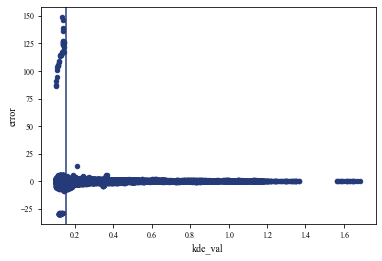

In [7]:
ax = df.plot.scatter(x='kde_val',y='error')
ax.axvline(0.15)

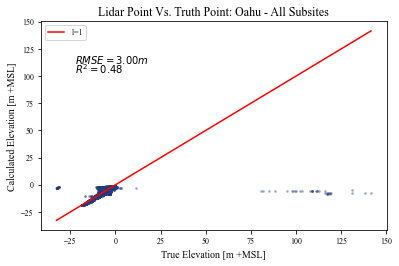

In [8]:
df_nona = df.dropna() 
errordict = {'RMSE':df_nona.error.pow(2).mean()**0.5,'R2 Score':r2_score(df_nona.true_elevation,df_nona.sf_elev_MSL)}
ax = error_lidar_pt_vs_truth_pt(df_nona,'Oahu - All Subsites',errordict)
ax.get_figure().savefig('../document/figures/Oahu_combined_lidar_estimated_vs_truth.pdf')

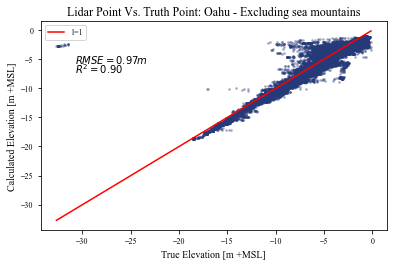

In [9]:
df_nona = df_nona[df_nona.true_elevation<0]
errordict = {'RMSE':df_nona.error.pow(2).mean()**0.5,'R2 Score':r2_score(df_nona.true_elevation,df_nona.sf_elev_MSL)}
ax= error_lidar_pt_vs_truth_pt(df_nona,'Oahu - Excluding sea mountains',errordict)
ax.get_figure().savefig('../document/figures/Oahu_combined_mountains_removed_lidar_estimated_vs_truth.pdf')

plotting photon map
finished plotting photons
finished adding basemap


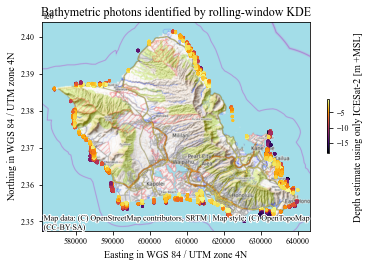

In [10]:
fig,ax = plt.subplots(figsize=set_size())
plot_photon_map(ax,df)
fig.savefig('../document/figures/Oahu_all_sites_photon_points.pdf')

plotting tracklines
finished plotting tracklines
finished plotting basemap


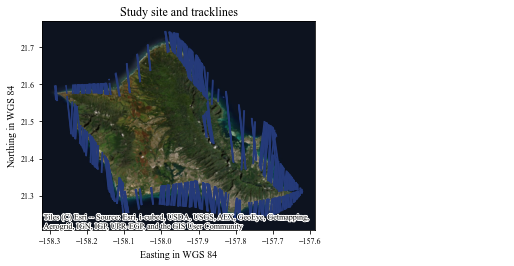

In [12]:
aoi_combined,trackax = plt.subplots(figsize=set_size())
plot_tracklines_overview(trackax,tracklines_combined)
trackax.plot(column='site',categorical=True,legend=True,facecolor="none",lw=3,ax=trackax)
# TODO fix categorical coloring on this
aoi_combined.savefig('../document/figures/Oahu_all_tracklines.pdf')

In [ ]:
df.columns

In [14]:
import numpy as np
rms_agg = lambda x: np.sqrt(np.mean(np.square(x)))

summary_table = df.groupby('Oahu site number').agg({'error':rms_agg,'error_abs':'mean','X':'count'}).rename(columns={'error':'RMSE','error_abs':'MAE','X':'Count bathy Points Identified'})
summary_table.style.to_latex(buf='../document/tables/Oahu_all_sites_RMSE_summary.tex',caption='Error metrics between ICESat-2 and ground-truth data for all sites in Oahu',position='h!',sparse_columns=False,hrules=True)
summary_table

,RMSE,MAE,Count bathy Points Identified
Oahu site number,,,
1,1.162525,0.768264,12727
2,10.598899,1.447226,4327
3,1.235418,0.463914,18556
4,0.753487,0.567063,2717
5,0.734813,0.504969,10443
6,2.422447,1.756412,754
7,1.111055,0.717672,2949
8,0.670264,0.520953,17929
